## Mission: Réaliser un algorithme de détection de la race d'un chien à partir de sa photo

### Notebook de prédiction qui prend des images de chiens en entrée et retourne les races réelles et les races prédites des chiens.
#### Les races de chiens reconnues sont :  
- Basset    
- Ibizan Hound  
- American Staff Terrier  
- Standard Schnauzer  
- Golden_retriever  
- Cocker_spaniel  
- Bouvier des Flandres  
- Rottweiler  
- Doberman  
- French_bulldog  
- Saint_Bernard  
- Siberian Husky  

## Sommaire

- [Importation des librairies](#Importation-librairies)
- [Importation du modèle InceptionV3](#Importation-modele)
- [Préparation de l'image](#preparation-image)
    - Chargement de l'image
    - Conversion de l'image en tableau numpy
    - Ajout d'une nouvelle dimension
    - Prétraitement de l'image
- [Affichage de photos et de leur classe prédite et réelle](#affichage)
    - Principe d'utilisation

## Importation des librairies

In [1]:
import os
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input
import matplotlib.pyplot as plt

2024-01-09 08:40:56.255943: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Importation du modèle InceptionV3

In [2]:
model = load_model('models_12_races/modele_inceptionv3.h5')

## Préparation de l'image

`Chargement de l'image`  
Redimensionnent de l'image à une taille de 299x299 pixels. Cette étape est cruciale car le modèle chargé (InceptionV3) nécessite que les images d'entrée soient de cette taille spécifique.

`Conversion de l'image en tableau Numpy`  
Les modèles de deep learning traitent les images sous forme de tableaux numériques, où chaque pixel est représenté par des valeurs numériques.

`Ajout d'une nouvelle dimension`  
Cela est nécessaire car le modèle s'attend à recevoir les données sous forme d'un lot (batch), même si on ne traite qu'une seule image. Cette nouvelle dimension représente la taille du lot.

`Prétraitement de l'image (preprocess_input)`  
preprocess_input(img_array): Applique un prétraitement spécifique requis par le modèle InceptionV3. Ce prétraitement est lié à la façon dont le modèle InceptionV3 a été entraîné initialement. Il peut inclure des opérations comme la normalisation des pixels (par exemple, mettre les valeurs de pixel à une échelle de 0 à 1, ou centrer les pixels par rapport à l'ensemble de données sur lequel le modèle a été formé).

In [3]:
def prepare_image(file):
    img = image.load_img(file, target_size=(299, 299))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array

## Affichage de photos et de leurs classe prédite et réelle

### Principe d'utilisation

Récupérer le modèle dans le notebook de transfer learning et le placer dans un dossier models_12_races.  
Placer les photos de chiens dont on veut détecter la race dans un dossier 'images_chiens' à la racine du projet. Leur donner un nom descriptif qui sera la race réelle affichée, avec un chiffre (la photo doit être en .jpg).  
Exécuter la cellule suivante affichera toutes les photos du dossier avec leur classe réelle et prédite.  
Les races de chiens reconnues sont :  
- Basset    
- Ibizan Hound  
- American Staff Terrier  
- Standard Schnauzer  
- Golden_retriever  
- Cocker_spaniel  
- Bouvier des Flandres  
- Rottweiler  
- Doberman  
- French_bulldog  
- Saint_Bernard  
- Siberian Husky  

1/1 [==============================] - 2s 2s/step


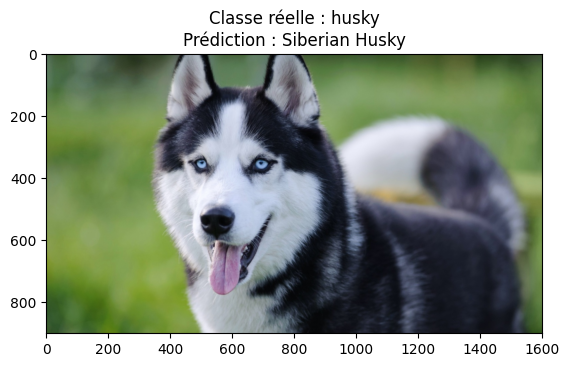

1/1 [==============================] - 0s 142ms/step


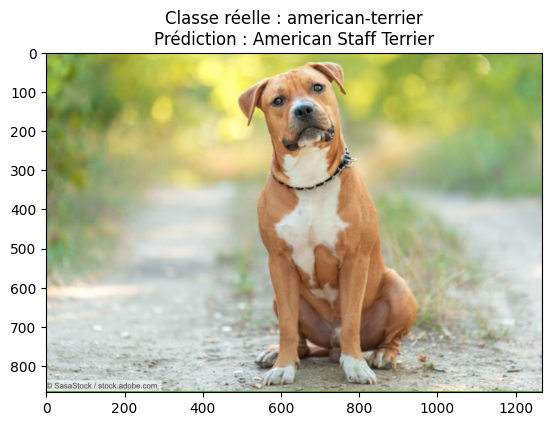

1/1 [==============================] - 0s 139ms/step


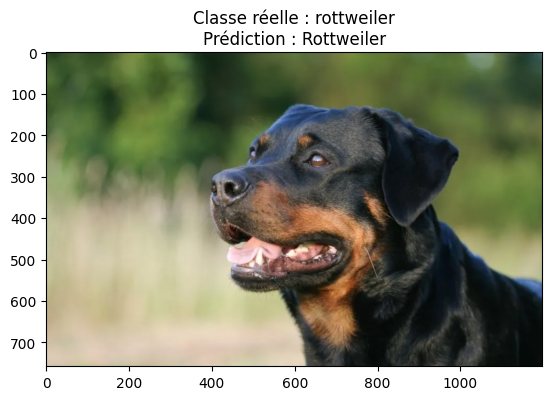

1/1 [==============================] - 0s 153ms/step


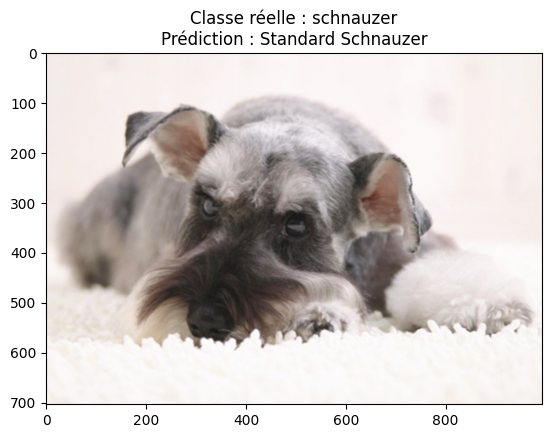

1/1 [==============================] - 0s 139ms/step


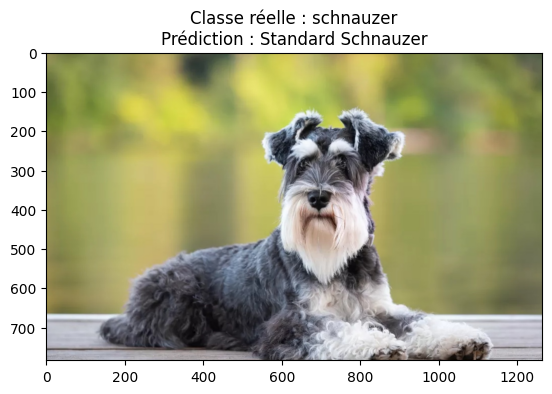

1/1 [==============================] - 0s 140ms/step


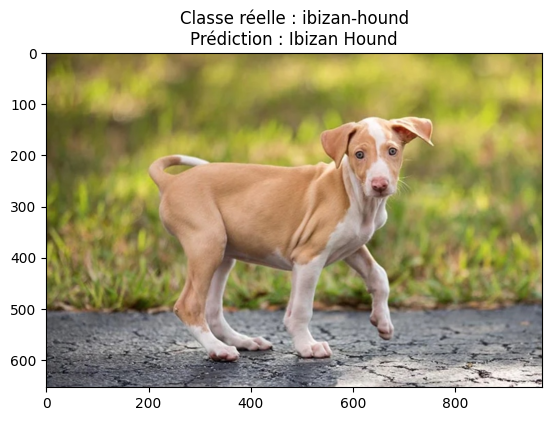

1/1 [==============================] - 0s 180ms/step


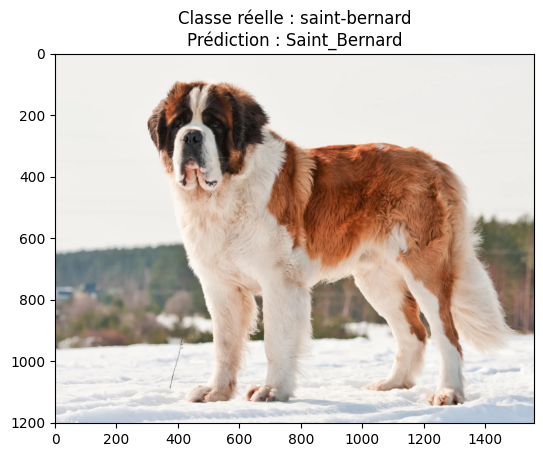

1/1 [==============================] - 0s 222ms/step


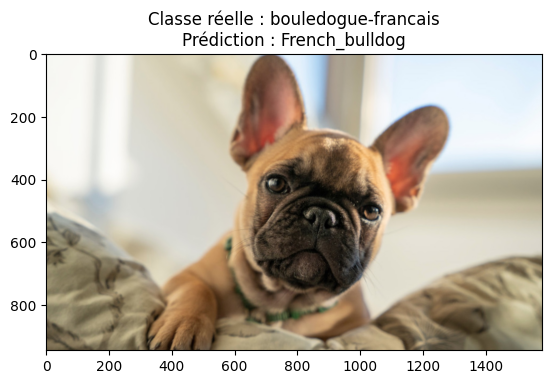

In [ ]:
# dossier contenant les images
folder_path = 'images_chiens'
images = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.jpg')]

# affichage des images avec la classe réelle et la prédiction
for img_path in images:
    img = prepare_image(img_path)
    prediction = model.predict(img)
    class_names = ['Basset', 'Ibizan Hound', 'American Staff Terrier', 'Standard Schnauzer', 'Golden_retriever', 'Cocker_spaniel', 'Bouvier des Flandres', 'Rottweiler', 'Doberman', 'French_bulldog', 'Saint_Bernard', 'Siberian Husky']
    predicted_class = class_names[np.argmax(prediction)]

    # pour afficher la classe réelle, on récupère le nom de fichier (sans extension et sans le dernier caractère qui est un nombre)
    real_class = os.path.splitext(os.path.basename(img_path))[0][:-1]

    plt.figure()
    plt.imshow(image.load_img(img_path))
    plt.title(f"Classe réelle : {real_class}\nPrédiction : {predicted_class}")
    plt.show()
